In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras

In [27]:
df=pd.read_csv('sonar_dataset.csv',header=None)
df.shape

(208, 61)

In [28]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
75,0.0202,0.0104,0.0325,0.0239,0.0807,0.1529,0.1154,0.0608,0.1317,0.1370,...,0.0127,0.0081,0.0067,0.0043,0.0065,0.0049,0.0054,0.0073,0.0054,R
64,0.0071,0.0103,0.0135,0.0494,0.0253,0.0806,0.0701,0.0738,0.0117,0.0898,...,0.0043,0.0048,0.0076,0.0124,0.0105,0.0054,0.0032,0.0073,0.0063,R
202,0.0272,0.0378,0.0488,0.0848,0.1127,0.1103,0.1349,0.2337,0.3113,0.3997,...,0.0091,0.0045,0.0043,0.0043,0.0098,0.0054,0.0051,0.0065,0.0103,M
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
81,0.0100,0.0194,0.0155,0.0489,0.0839,0.1009,0.1627,0.2071,0.2696,0.2990,...,0.0130,0.0073,0.0077,0.0075,0.0060,0.0080,0.0019,0.0053,0.0019,R


In [29]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [30]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [31]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [32]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [55]:
X=df.drop(60,axis='columns')
y=df[60]
y.sample(5)

109    M
138    M
198    M
75     R
133    M
Name: 60, dtype: object

In [65]:
for column in df:
     df[column].replace({'R': 1,'M': 0},inplace=True)


In [66]:
df[60].sample(5)

174    0
90     1
70     1
16     1
51     1
Name: 60, dtype: int64

In [67]:
y.value_counts()

60
0    111
1     97
Name: count, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [71]:
X_train.shape



(156, 60)

In [72]:
X_test.shape

(52, 60)

loss should be binary_crossentropy since its a binary classification problem

In [73]:
model=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.5605 - loss: 0.6903 
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.5222 - loss: 0.6819
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.5543 - loss: 0.6670
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.6670 - loss: 0.6418
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.7302 - loss: 0.6065
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.7627 - loss: 0.5701
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.7944 - loss: 0.5309
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.7384 - loss: 0.5187
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8480 - loss: 0.4526
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8139 - loss: 0.4192
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8103 - loss: 0.4220
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/ste

In [74]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7420 - loss: 0.9140 


[0.8288494348526001, 0.7692307829856873]

In [80]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[6.3009553e-09 9.3754703e-01 5.2833891e-01 4.5243578e-05 9.9999613e-01
 9.9997455e-01 5.7933038e-01 9.9999613e-01 1.1785096e-04 9.9999869e-01]
[0. 1. 1. 0. 1. 1. 1. 1. 0. 1.]


In [79]:
y_test[:10]

186    0
155    0
165    0
200    0
58     1
34     1
151    0
18     1
202    0
62     1
Name: 60, dtype: int64

In [81]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.78      0.72      0.75        25

    accuracy                           0.77        52
   macro avg       0.77      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



In [84]:
cm=confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Truth')

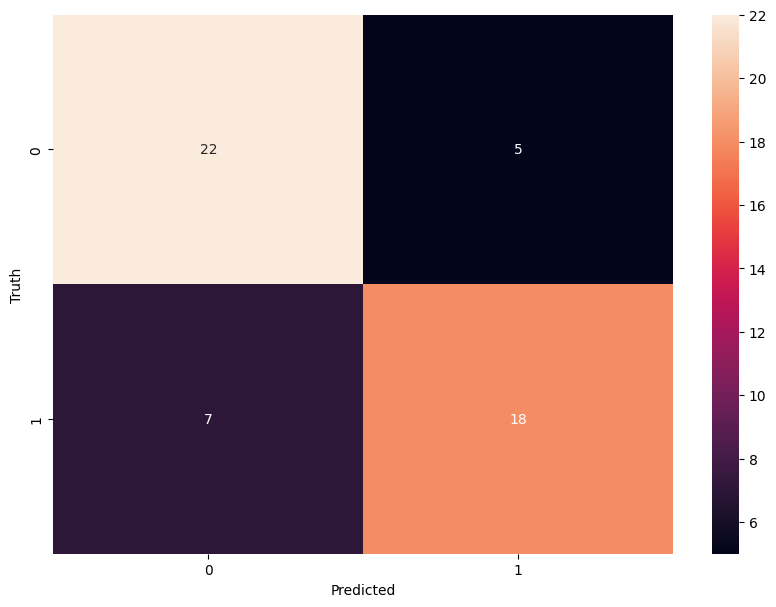

In [85]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

here we add a dropout layer

In [86]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.4763 - loss: 0.7397 
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.5225 - loss: 0.6990
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4516 - loss: 0.7134
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.4248 - loss: 0.7188
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.5477 - loss: 0.6915
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.5460 - loss: 0.6846
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.5347 - loss: 0.6927
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.4557 - loss: 0.7136
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.6473 - loss: 0.6765
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.4875 - loss: 0.6966
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5110 - loss: 0.6981
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/ste

In [91]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7420 - loss: 0.9140 


[0.8288494348526001, 0.7692307829856873]

In [92]:
y_pred = modeld.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[6.8493560e-04 5.6112921e-01 8.4796798e-01 4.2321607e-02 9.9897528e-01
 8.9642501e-01 3.4050274e-01 9.9935716e-01 4.8075099e-02 9.9928594e-01]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [93]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.84      0.64      0.73        25

    accuracy                           0.77        52
   macro avg       0.78      0.76      0.76        52
weighted avg       0.78      0.77      0.77        52

